In [4]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import math
import h5py

plt.rcParams["figure.figsize"] = (20,15)

# Initial Setups
These steps are done to import data from the provided file into an array.

In [9]:
hf = h5py.File('gammaray_lab4.h5', 'r')
hf

<HDF5 file "gammaray_lab4.h5" (mode r)>

In [7]:
hf.keys()

<KeysViewHDF5 ['data']>

In [10]:
data = np.array(hf.get('data'))
data

array([[9.40680016e+08, 9.40680016e+08, 9.40680016e+08, ...,
        9.43272016e+08, 9.43272016e+08, 9.43272016e+08],
       [3.15000000e+02, 3.15007112e+02, 3.15014225e+02, ...,
        3.45319109e+02, 3.45326221e+02, 3.45333333e+02],
       [4.50000000e+01, 4.50066667e+01, 4.50133333e+01, ...,
        4.49866667e+01, 4.49933333e+01, 4.50000000e+01],
       [1.00000000e+01, 8.00000000e+00, 7.00000000e+00, ...,
        8.00000000e+00, 1.10000000e+01, 1.20000000e+01]])

In [11]:
data[:,0]

array([9.40680016e+08, 3.15000000e+02, 4.50000000e+01, 1.00000000e+01])

In [12]:
hf.close()

We close the file after obtaining the data we needed.

We will also define a function that allows us to plot the average of y for a 2D histogram, using x and y datasets as well as the bins used for x and y.
Each average value for each bin in the x direction will be placed in the midpoint of binx.

In [28]:
def findavg(x, y, binx, biny):
    digitx = np.digitize(x, binx)
    total = np.zeros(len(binx))
    count = np.zeros(len(binx))
    for i in np.arange(len(y)):
        bin_num = digitx[i]
        total[bin_num - 1] += y[i]
        count[bin_num - 1] += 1
    average_y = np.zeros(len(binx))
    for i in np.arange(len(binx)):
        average[i] = total[i] / count[i]
    mid_point_x = binx + (binx[1] - binx[0]) / 2
    return mid_point_x, average_y

# Problem 1

In [16]:
len(data[0,:])

25920001

Our data has 4 columns and 25,920,001 rows.
<br>

The columns are :
<br> **Time** (GPS Seconds)
<br> **Solar Phase** (Degrees)
<br> **Earth Longtitude** (Degrees)
<br> **Particle Counts**

## 1)

We shall plot the Particle Counts against each of the first 3 columns on 2D histograms to see the relationship between variables:
<br> We will weight the histogram with Particle Counts since multiple counts = multiple data for the same Time/Solar Phase/Earth Longitude.
<br> But first, we will find the max and min of each parameter so we can adjust out bins accordingly.

### Time:

In [37]:
print(max(data[0,:]))
print(min(data[0,:]))

943272016.0
940680016.0


### Solar Phase:

In [39]:
print(max(data[1,:]))
print(min(data[1,:]))

359.9999986496987
6.9941888796165586e-06


### Earth Longitude:

In [40]:
print(max(data[2,:]))
print(min(data[2,:]))

359.9933333317458
0.0


### Particle Counts:

In [42]:
print(max(data[3,:]))
print(min(data[3,:]))

30.0
0.0


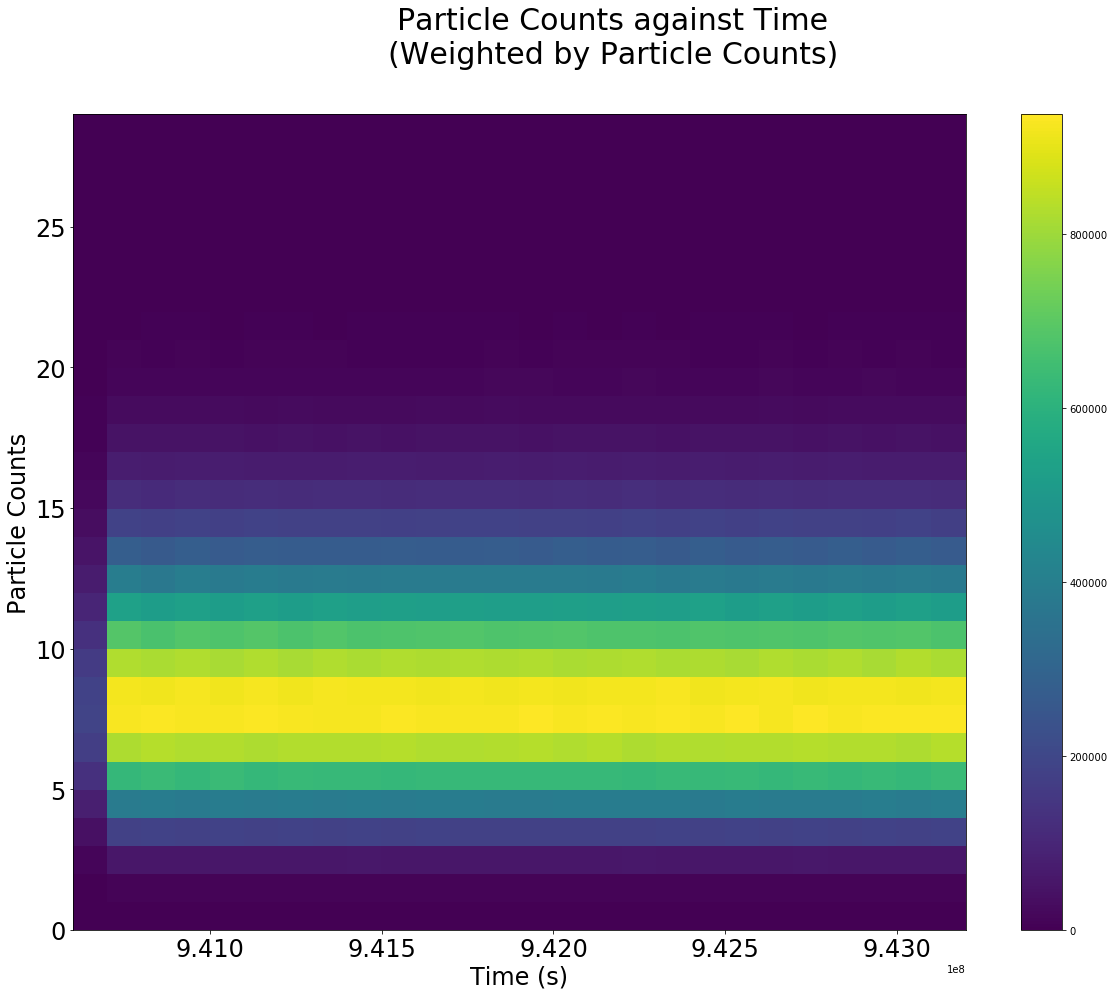

In [74]:
plt.suptitle('Particle Counts against Time\n(Weighted by Particle Counts)', fontsize=30)
plt.xlabel('Time (s)', fontsize = 24)
plt.ylabel('Particle Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
binx = np.arange(9.406e+8,9.433e+8, 0.001e+8)
biny = np.arange(0,30)
plt.hist2d(data[0,:], data[3,:],  bins = [binx, biny], weights = data[3,:])
plt.colorbar()

We can observe that most Particle counts are between 7-8 particles, constant and unrelated to time.

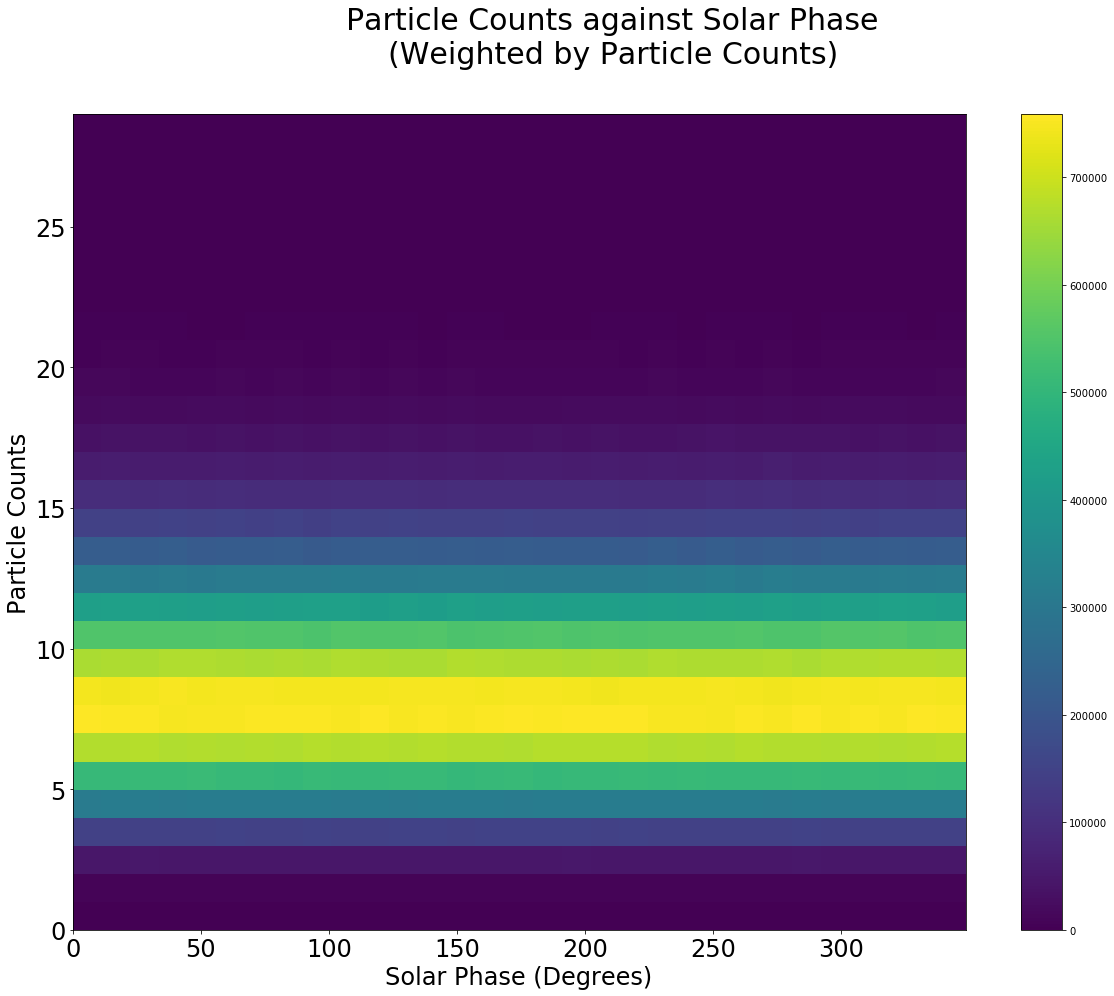

In [75]:
plt.suptitle('Particle Counts against Solar Phase\n(Weighted by Particle Counts)', fontsize=30)
plt.xlabel('Solar Phase (Degrees)', fontsize = 24)
plt.ylabel('Particle Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
binx = np.arange(0, 360, 11.25)
biny = np.arange(0,30)
plt.hist2d(data[1,:], data[3,:],  bins = [binx, biny], weights = data[3,:])
plt.colorbar()

We can observe that most Particle counts are between 7-8 particles, constant and unrelated to Solar Phase.

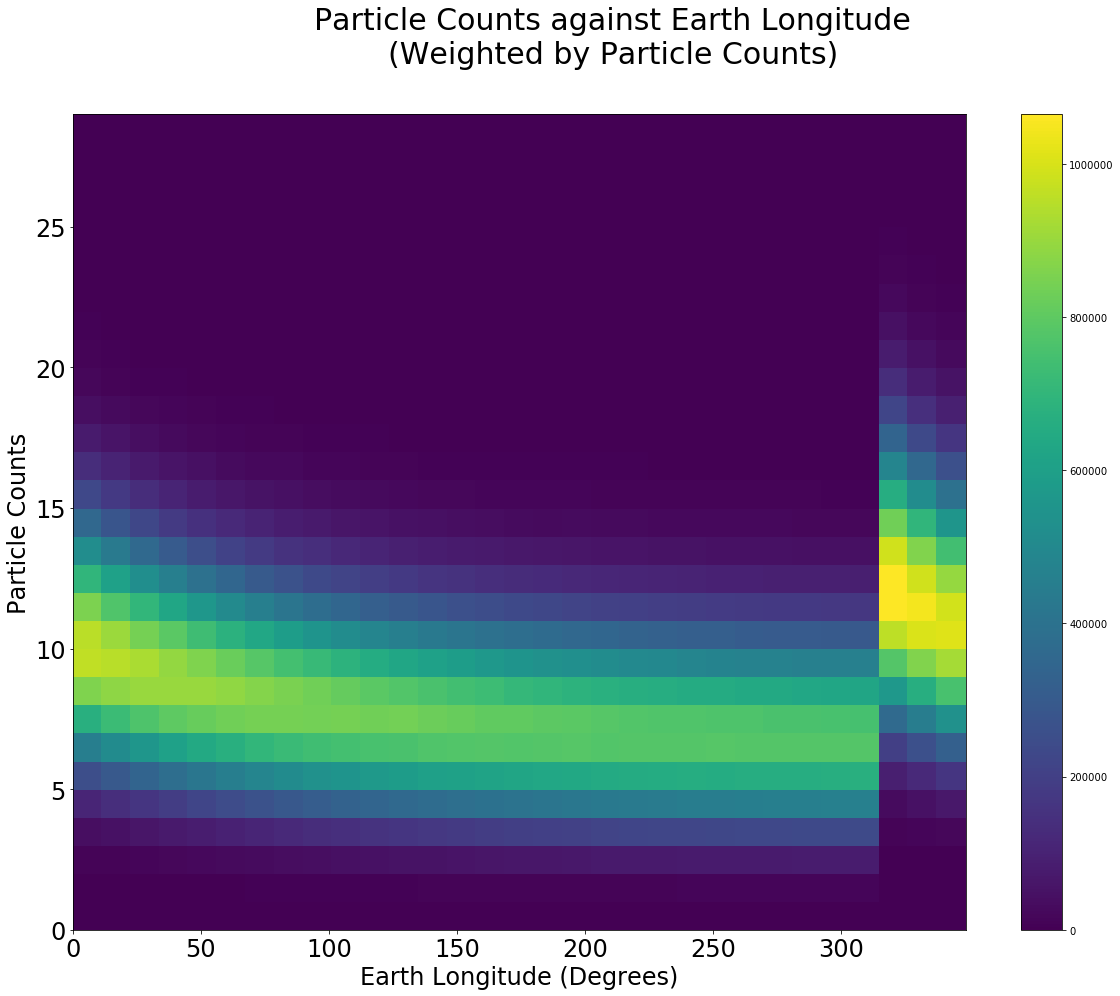

In [76]:
plt.suptitle('Particle Counts against Earth Longitude\n(Weighted by Particle Counts)', fontsize=30)
plt.xlabel('Earth Longitude (Degrees)', fontsize = 24)
plt.ylabel('Particle Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
binx = np.arange(0, 360, 11.25)
biny = np.arange(0,30)
plt.hist2d(data[2,:], data[3,:],  bins = [binx, biny], weights = data[3,:])
plt.colorbar()

There seems to be a relationship between Paricle counts and Earth longitude.
<br> Between $-33.75^{\circ} <= \theta <= 326.25^{\circ}$ Particle count decreases with increasing Earth longitude. 

We've finished plotting the Particle Counts in 2D histograms.
Since we did not see bright bins except on or near the brightest line, we can conclude that:

While it's possible that outlier data may exist, they are not large enough in size so that they interfere with the trend of the data. 

[]

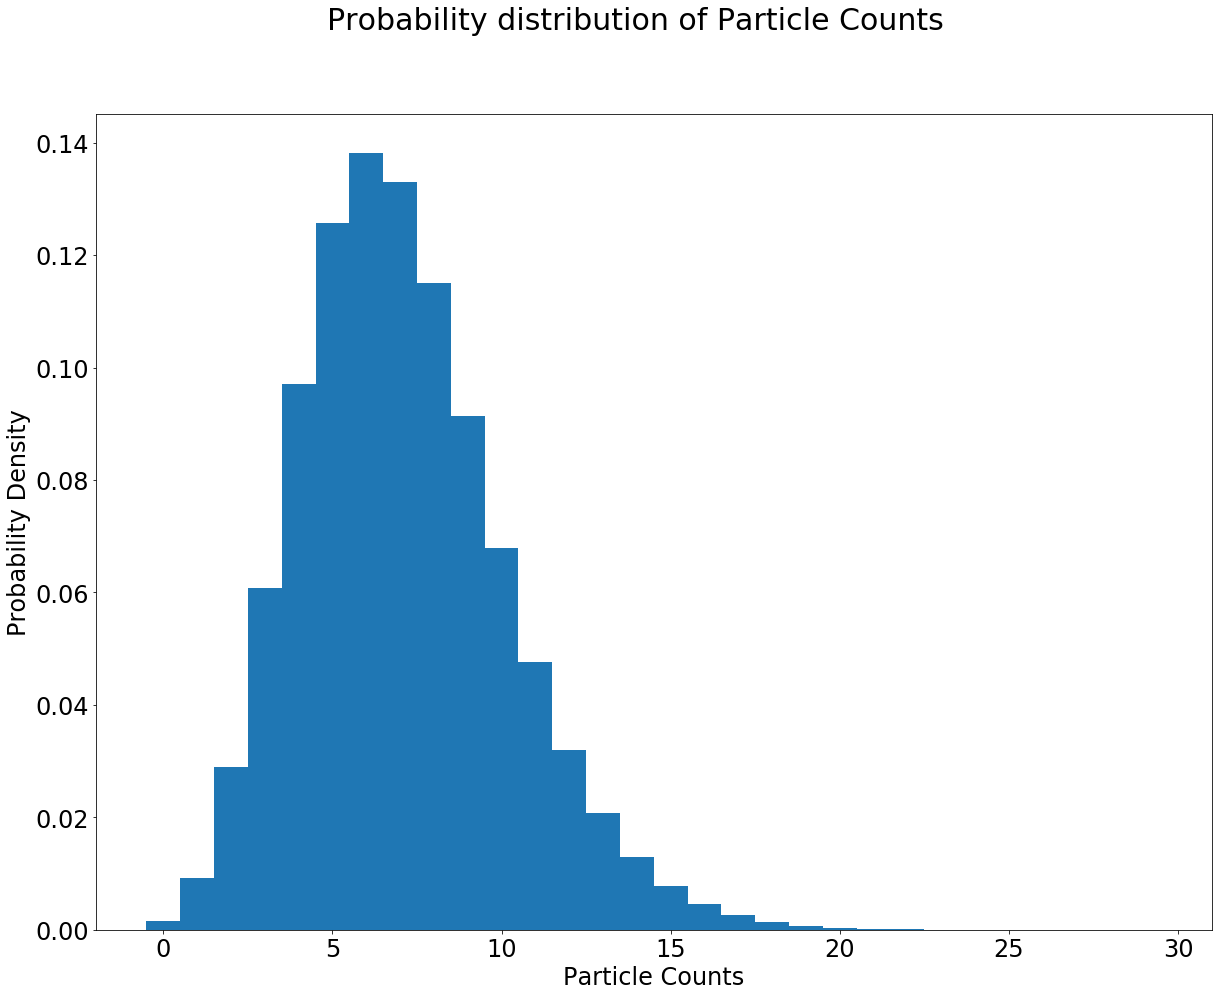

In [173]:
plt.suptitle('Probability distribution of Particle Counts', fontsize=30)
plt.xlabel('Particle Counts', fontsize = 24)
plt.ylabel('Probability Density', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data[3,:], bins = np.arange(-0.5,30.5), density = True)
plt.plot()

[]

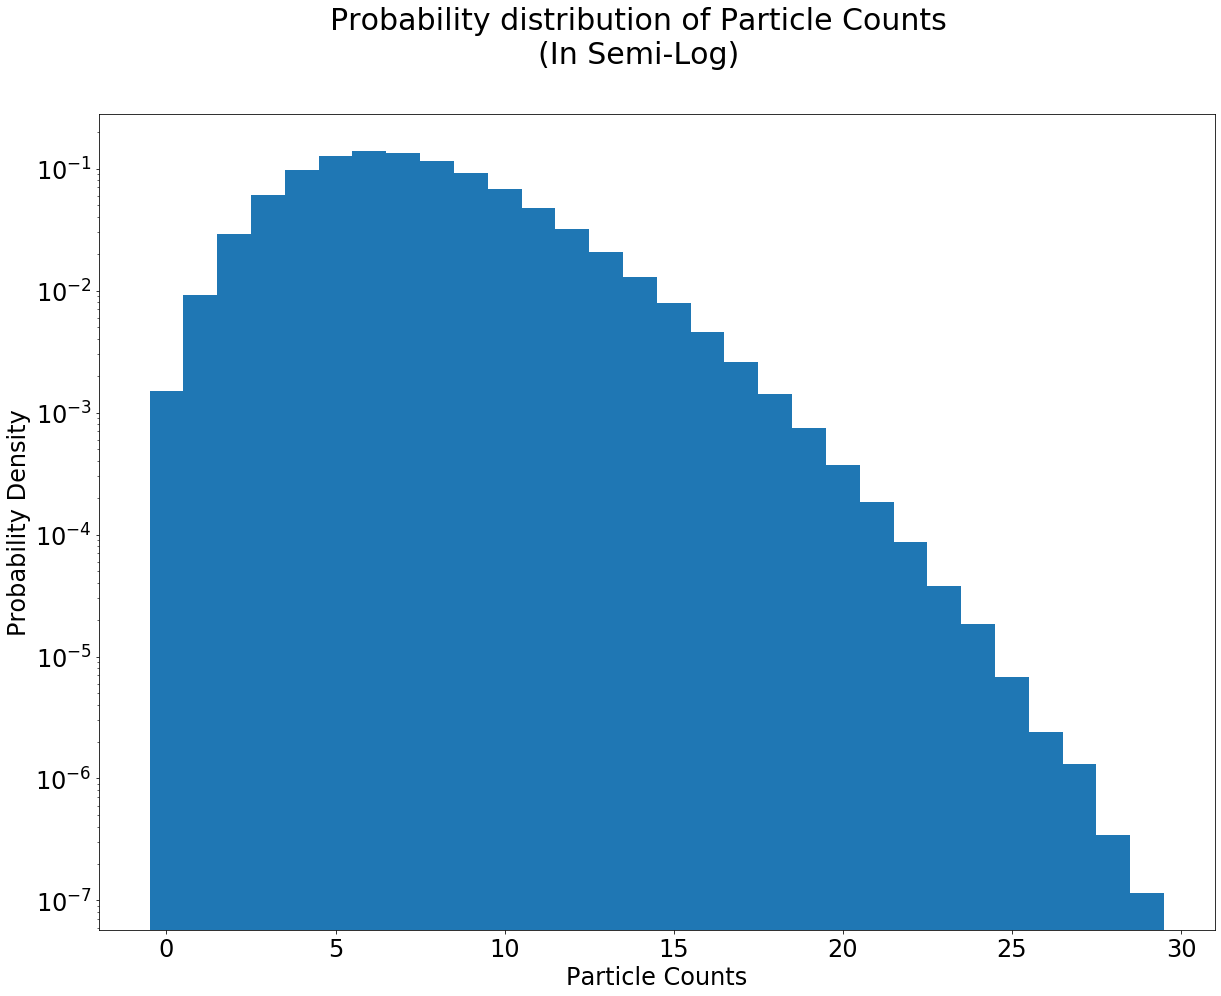

In [172]:
plt.suptitle('Probability distribution of Particle Counts\n(In Semi-Log)', fontsize=30)
plt.xlabel('Particle Counts', fontsize = 24)
plt.ylabel('Probability Density', fontsize = 24)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.hist(data[3,:], bins = np.arange(-0.5,30.5), density = True)
plt.plot()

The probability distribution of the Particle Counts appears to be a Poisson Distribution centered at 6.
<br> This would be a good choice to set as our background PDF.

To seek for contamination in the data, we will plot Particle Counts against the 3 parameters respectively, using a scatterplot.
<br>Due to the size of the data we're using every 1000th point.

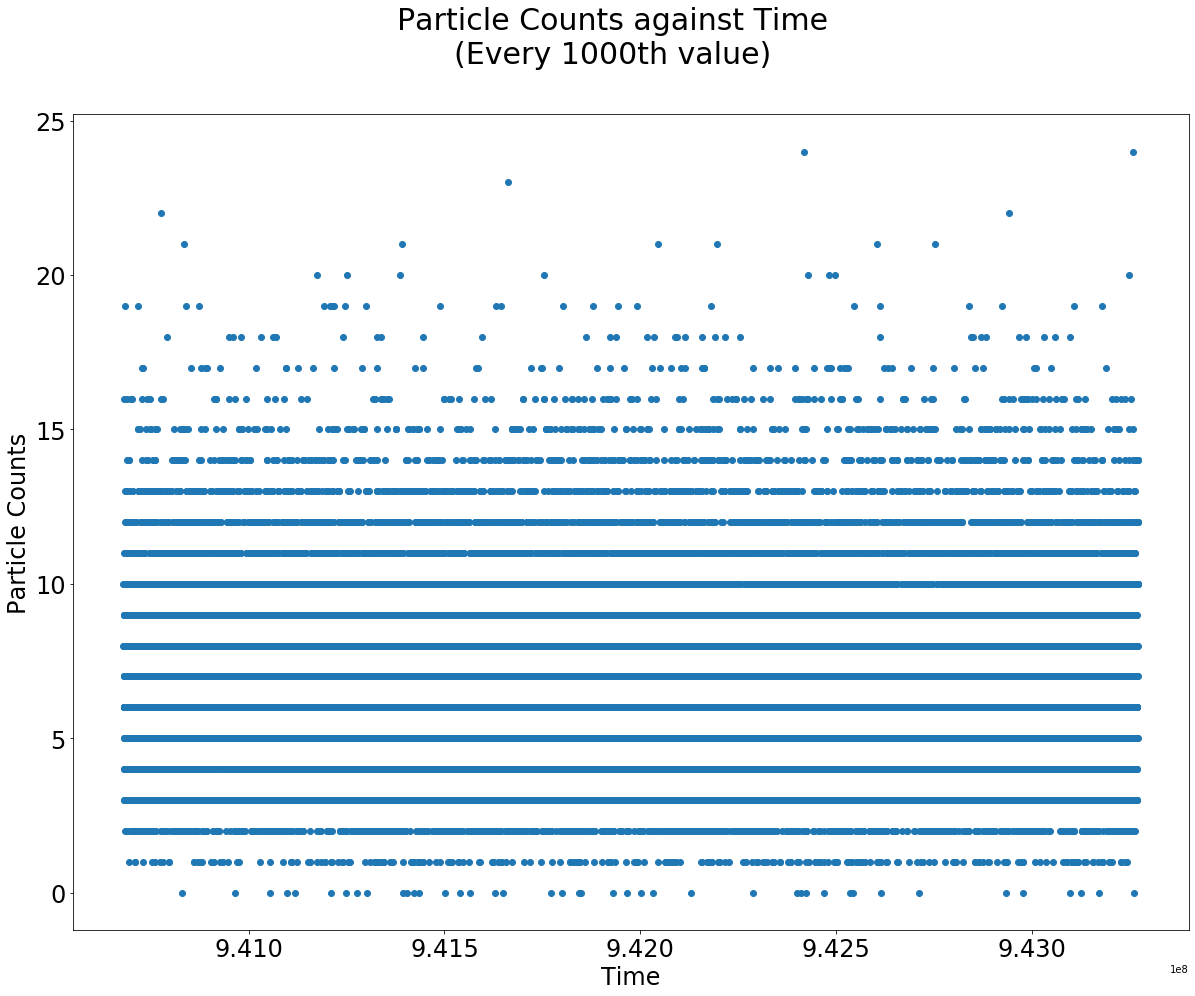

In [72]:
plt.suptitle('Particle Counts against Time\n(Every 1000th value)', fontsize=30)
plt.xlabel('Time', fontsize = 24)
plt.ylabel('Particle Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data[0,0::1000], data[3,0::1000])

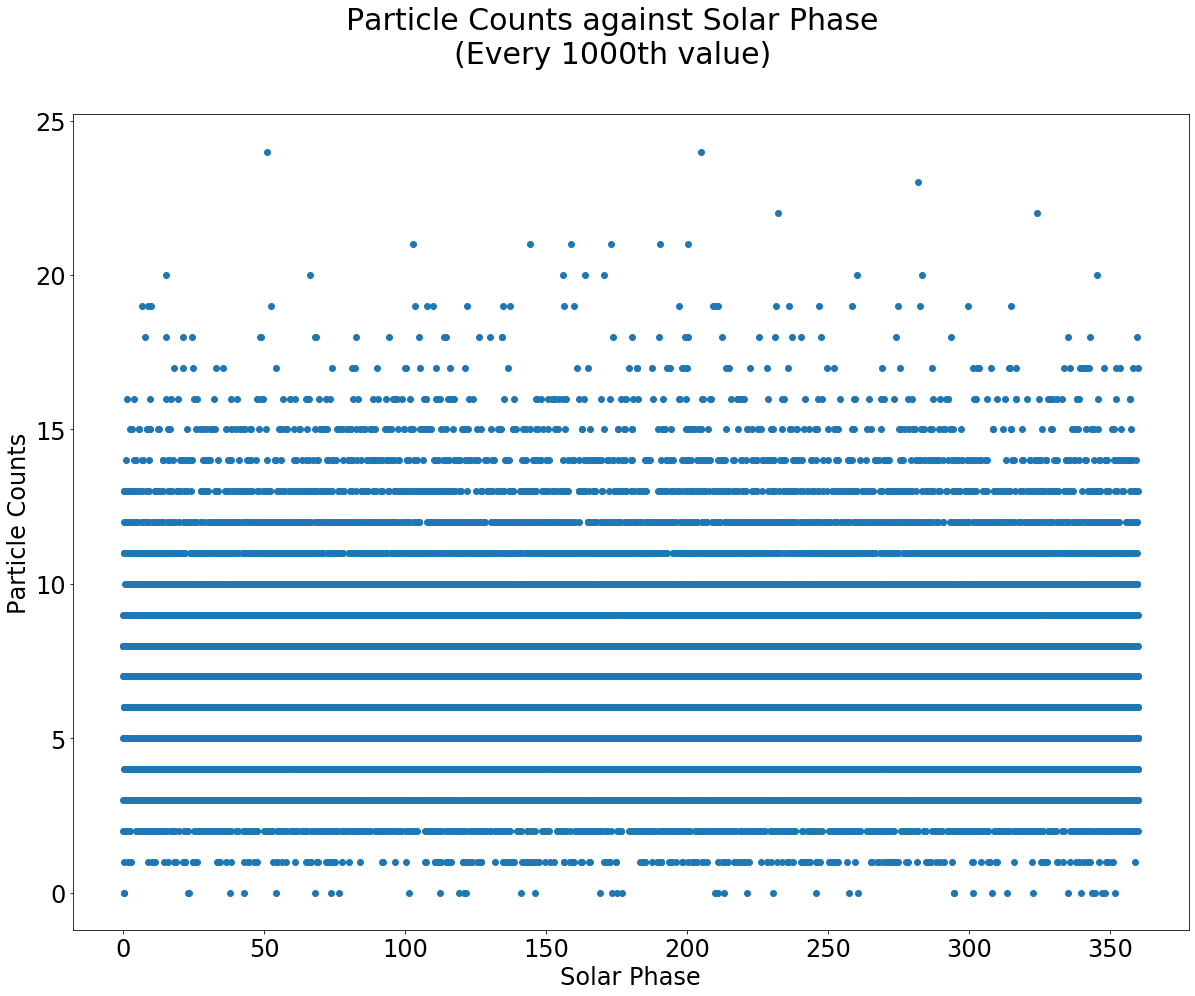

In [78]:
plt.suptitle('Particle Counts against Solar Phase\n(Every 1000th value)', fontsize=30)
plt.xlabel('Solar Phase', fontsize = 24)
plt.ylabel('Particle Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data[1,0::1000], data[3,0::1000])

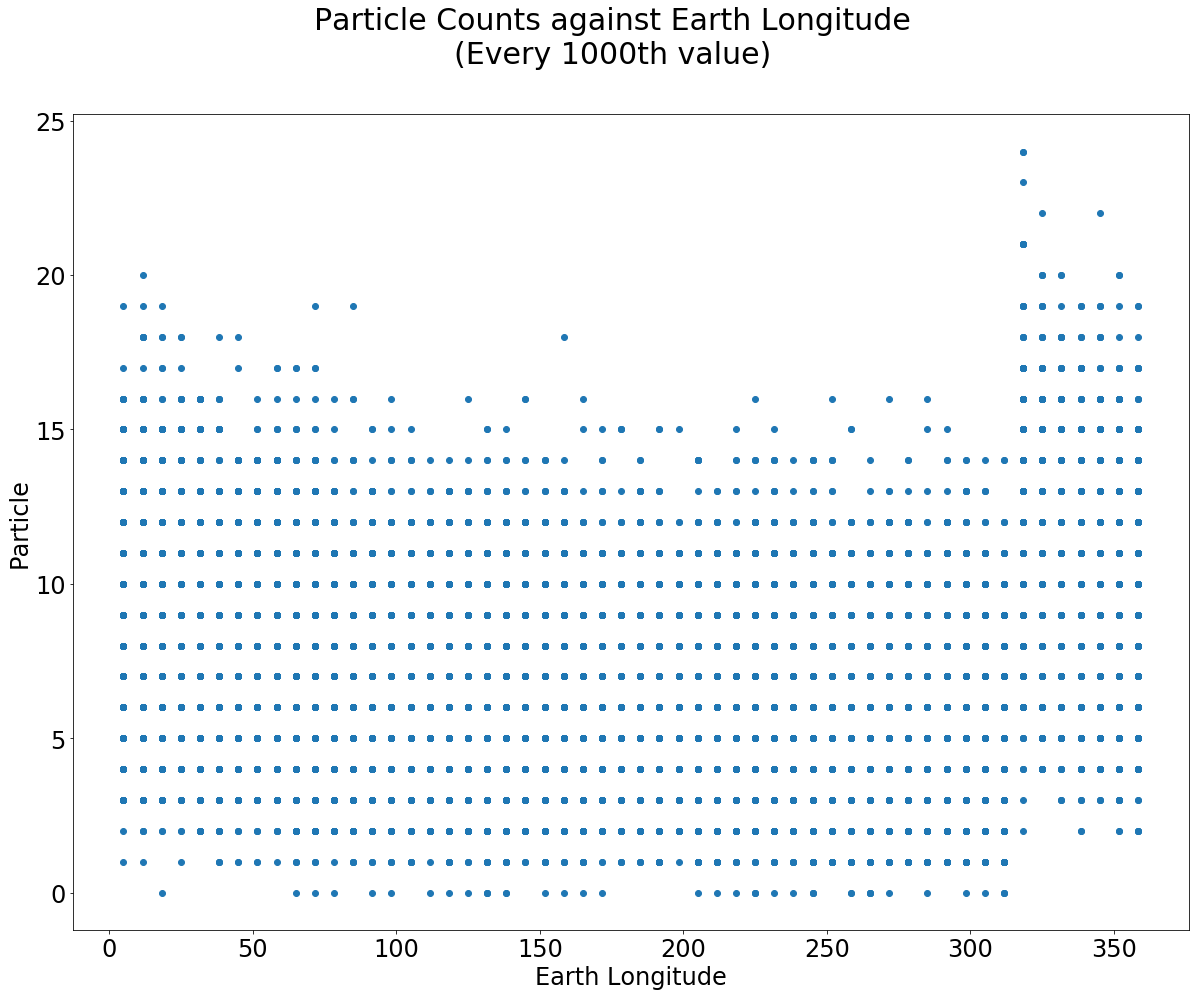

In [79]:
plt.suptitle('Particle Counts against Earth Longitude\n(Every 1000th value)', fontsize=30)
plt.xlabel('Earth Longitude', fontsize = 24)
plt.ylabel('Particle', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data[2,0::1000], data[3,0::1000])

From the plots above, we're not seeing any 'extreme' outlier data that are far beyond the rest of the data.
<br>It's reasonable to suggest that we have few, if any, signal contamination.

## 2)

From the 2D histograms above, we see the average of particle is not consistent with respect to **Earth Longitude**.
<br>Thus, we will plot the probability distribution of Particle Count under the constraint of Earth Longitude. 

First of all, we separate the Earth Longitudes into bins of 11.25 ($\frac{360}{32}$)degrees, as we did in the 2d histogram.

In [180]:
bin_el = np.arange(0, 360, 360/32)
bin_el
#digit_el = np.digitize(data[2,:], bin_el)
#len(bin_el)

array([  0.  ,  11.25,  22.5 ,  33.75,  45.  ,  56.25,  67.5 ,  78.75,
        90.  , 101.25, 112.5 , 123.75, 135.  , 146.25, 157.5 , 168.75,
       180.  , 191.25, 202.5 , 213.75, 225.  , 236.25, 247.5 , 258.75,
       270.  , 281.25, 292.5 , 303.75, 315.  , 326.25, 337.5 , 348.75])

We'll plot some extreme ends first.
In the 2D histogram, at Earth Longitude between 326.25 and 337.5 degrees (Bin #30), most of the Particle Count is 12.
<br>We shall plot a histogram for all data entries that fall into bin #30, as well as calculate the average of the all the Particle Counts in that bin.

In [187]:
earth_longitude = data[2,:]
indices = np.intersect1d(np.where(326.25 <= earth_longitude), np.where(337.5 >= earth_longitude))

In [188]:
selected = data[3,:][indices]
selected

array([14.,  6., 11., ...,  8., 11., 14.])

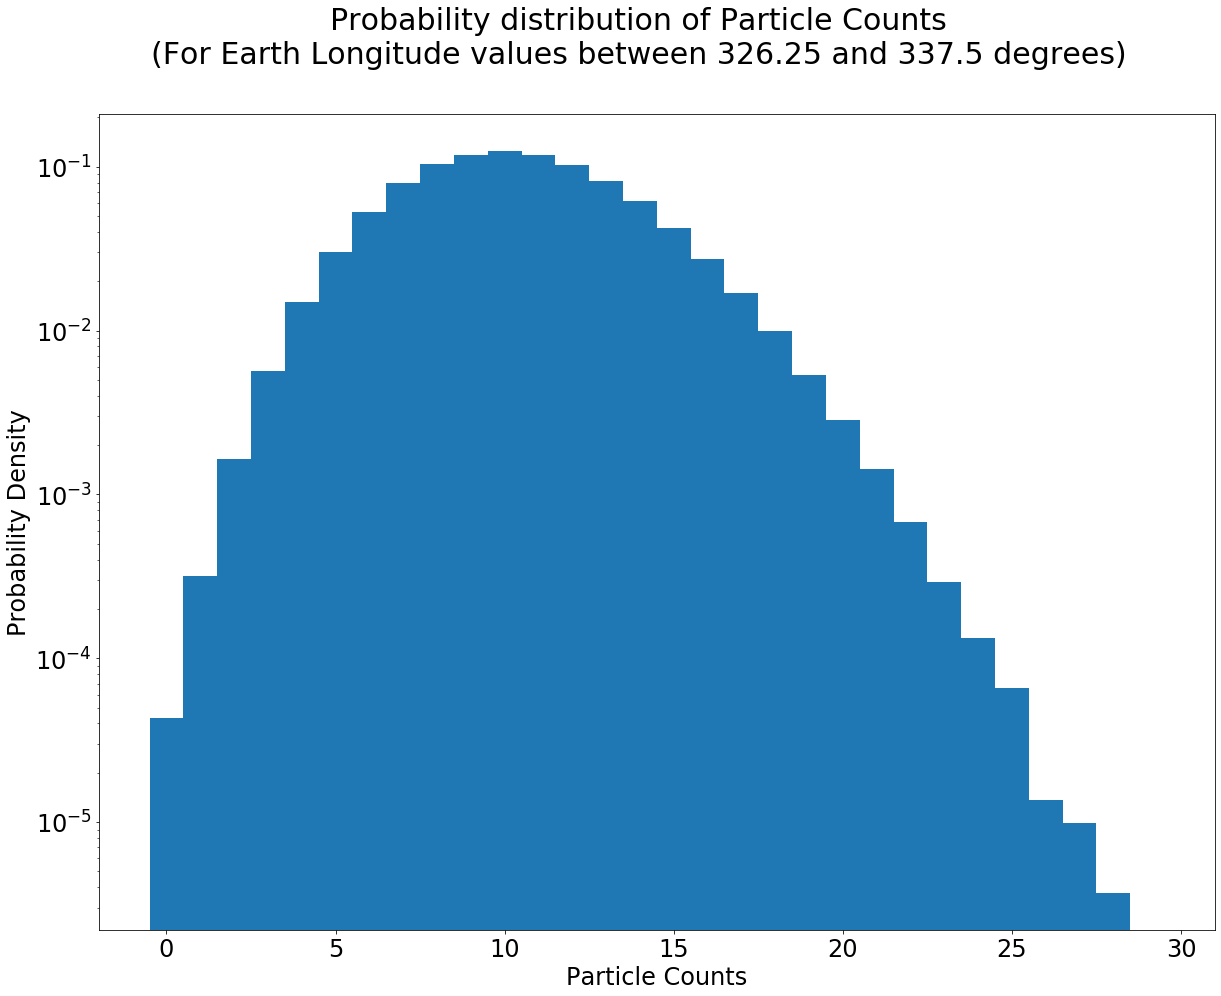

The mean is 10.422722896919431.


In [189]:
plt.suptitle('Probability distribution of Particle Counts\n(For Earth Longitude values between 326.25 and 337.5 degrees)', fontsize=30)
plt.xlabel('Particle Counts', fontsize = 24)
plt.ylabel('Probability Density', fontsize = 24)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.hist(selected, bins = np.arange(-0.5,30.5), density = True)
plt.show()
print("The mean is " + str(np.mean(selected)) + "." )

We can clearly see that for this range of Earth Longitude, we still have a Poisson distribution shape,
<br>but the distribution now has the average 10.42 instead of 6.

Next, we will do the same for some other bins for Earth Longitude.

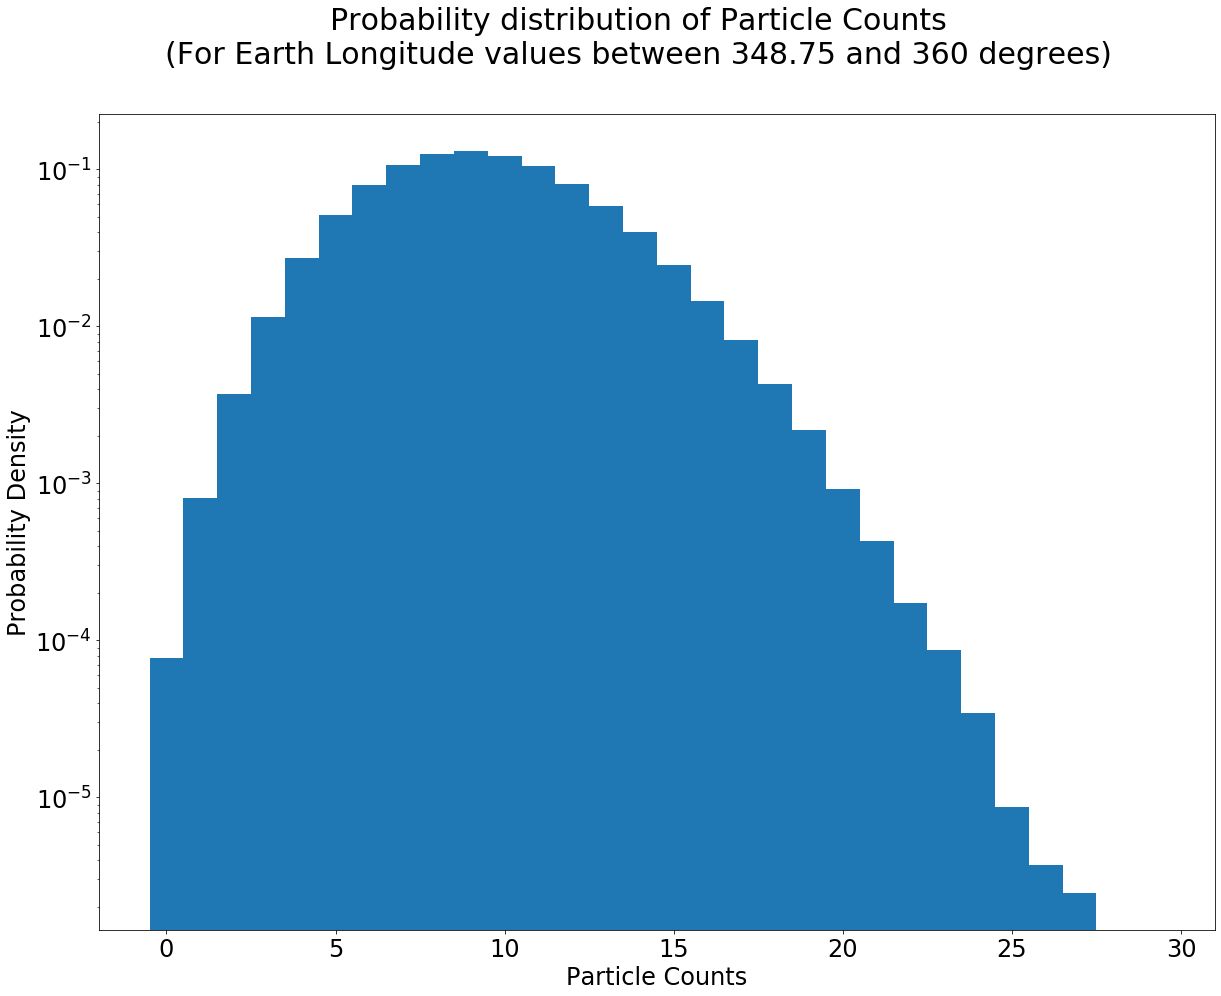

The mean is 9.380700454455642.


In [190]:
indices = np.intersect1d(np.where(348.75 <= data[2,:]), np.where(360 >= data[2,:]))
selected = data[3,:][indices]
plt.suptitle('Probability distribution of Particle Counts\n(For Earth Longitude values between 348.75 and 360 degrees)', fontsize=30)
plt.xlabel('Particle Counts', fontsize = 24)
plt.ylabel('Probability Density', fontsize = 24)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.hist(selected, bins = np.arange(-0.5,30.5), density = True)
plt.show()
print("The mean is " + str(np.mean(selected)) + "." )

When we increase our Earth Longitude to between 348.75 and 360, the average drops to 9.38.

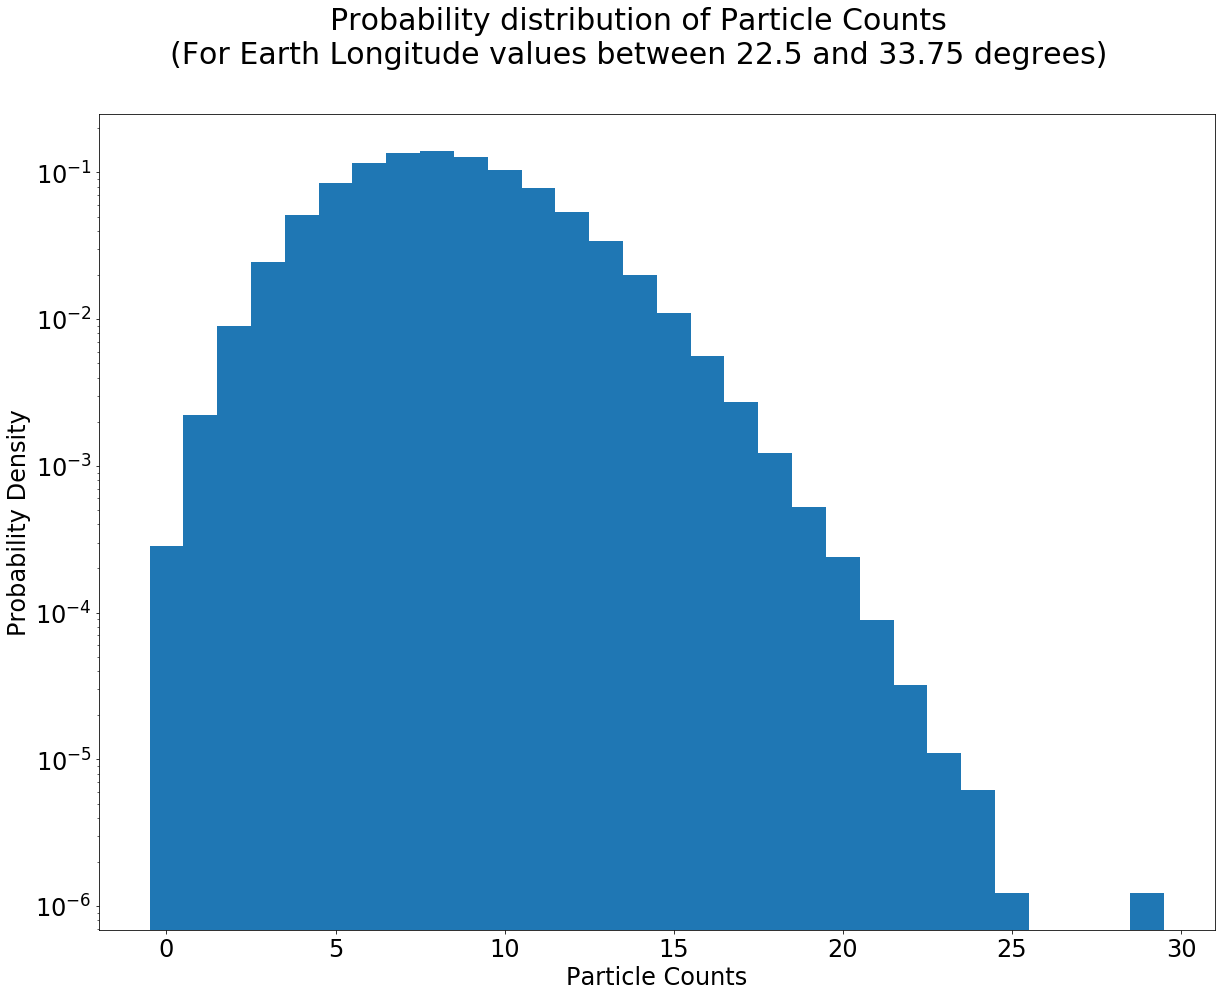

The mean is 8.228942041864139.


In [207]:
indices = np.intersect1d(np.where(11.25 * 2 <= data[2,:]), np.where(11.25 * 3 >= data[2,:]))
selected = data[3,:][indices]
plt.suptitle('Probability distribution of Particle Counts\n(For Earth Longitude values between ' + str(11.25 * 2) + ' and ' + str(11.25 * 3) + ' degrees)', fontsize=30)
plt.xlabel('Particle Counts', fontsize = 24)
plt.ylabel('Probability Density', fontsize = 24)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.hist(selected, bins = np.arange(-0.5,30.5), density = True)
plt.show()
print("The mean is " + str(np.mean(selected)) + "." )

When we increase our Earth Longitude to between 22.5 and 33.75, the average drops to 8.23.

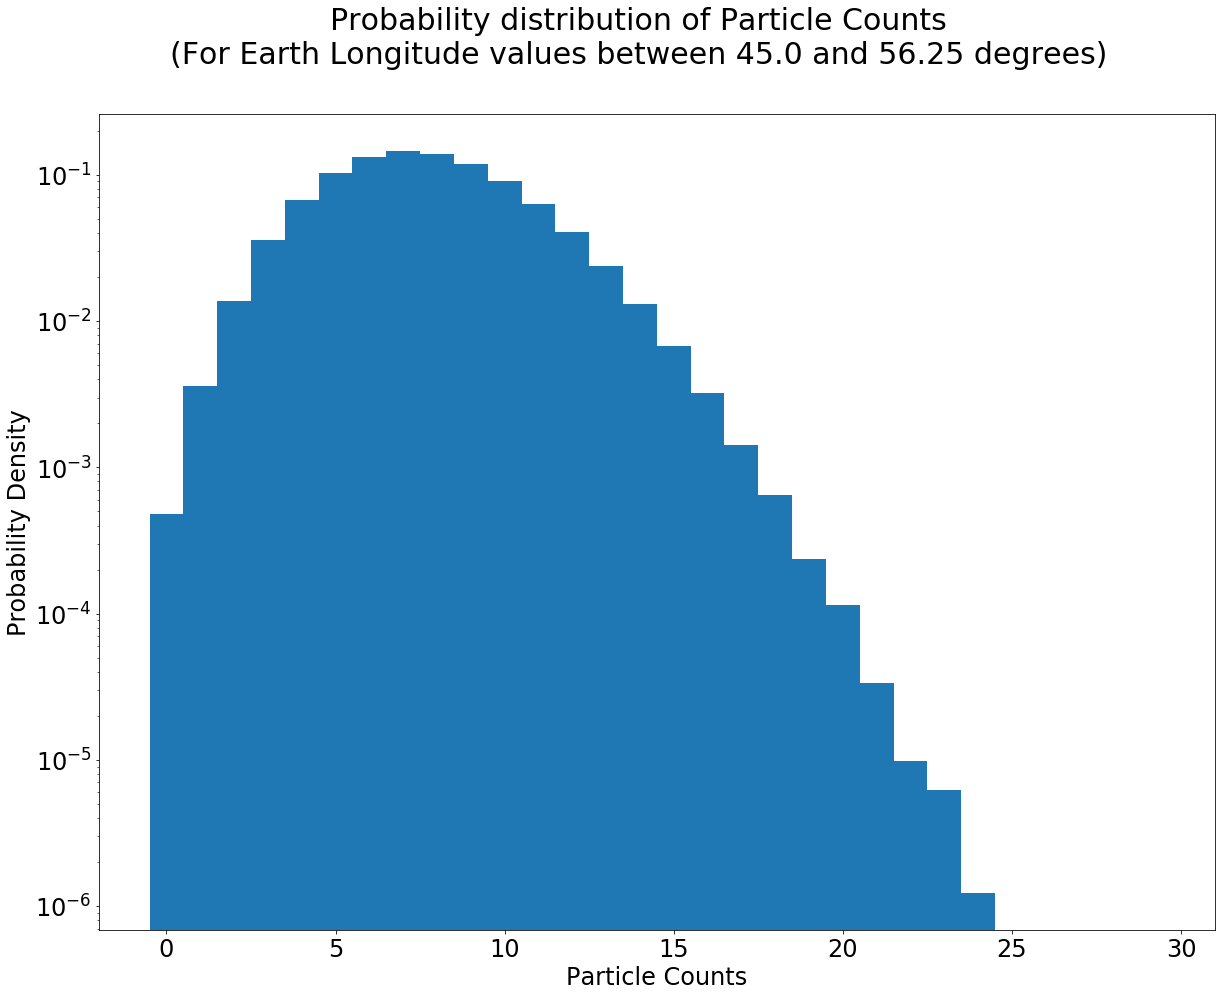

The mean is 7.671508847367635.


In [191]:
indices = np.intersect1d(np.where(11.25 * 4 <= data[2,:]), np.where(11.25 * 5 >= data[2,:]))
selected = data[3,:][indices]
plt.suptitle('Probability distribution of Particle Counts\n(For Earth Longitude values between ' + str(11.25 * 4) + ' and ' + str(11.25 * 5) + ' degrees)', fontsize=30)
plt.xlabel('Particle Counts', fontsize = 24)
plt.ylabel('Probability Density', fontsize = 24)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.hist(selected, bins = np.arange(-0.5,30.5), density = True)
plt.show()
print("The mean is " + str(np.mean(selected)) + "." )

When we increase our Earth Longitude to between 45 and 56.25, the average drops to 7.67.

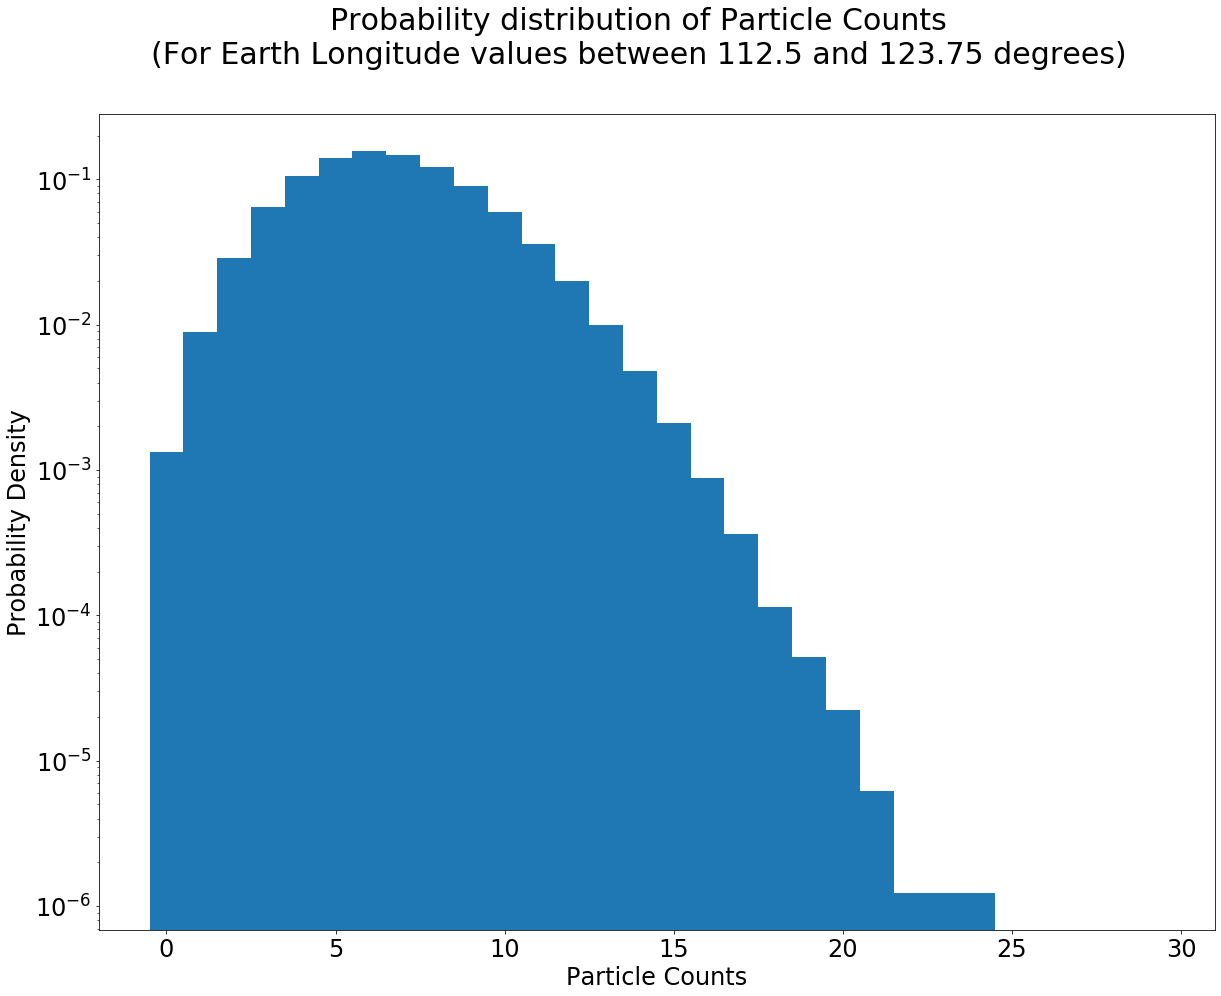

The mean is 6.628556970774092.


In [209]:
indices = np.intersect1d(np.where(11.25 * 10 <= data[2,:]), np.where(11.25 * 11 >= data[2,:]))
selected = data[3,:][indices]
plt.suptitle('Probability distribution of Particle Counts\n(For Earth Longitude values between ' + str(11.25 * 10) + ' and ' + str(11.25 * 11) + ' degrees)', fontsize=30)
plt.xlabel('Particle Counts', fontsize = 24)
plt.ylabel('Probability Density', fontsize = 24)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.hist(selected, bins = np.arange(-0.5,30.5), density = True)
plt.show()
print("The mean is " + str(np.mean(selected)) + "." )

When we increase our Earth Longitude to between 112.5 and 123.75, the average drops to 6.63.

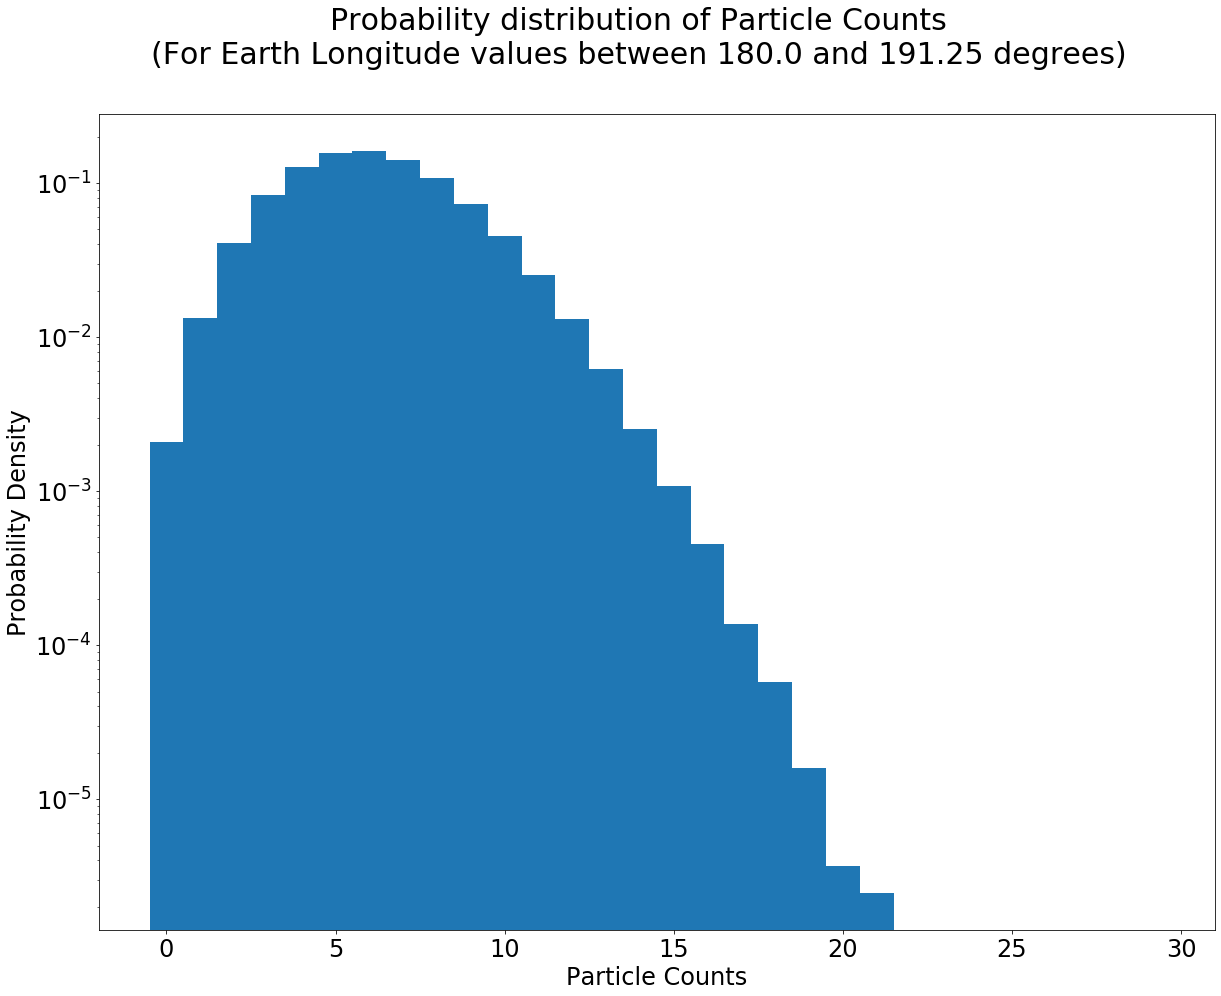

The mean is 6.137641933254344.


In [192]:
indices = np.intersect1d(np.where(11.25 * 16 <= data[2,:]), np.where(11.25 * 17 >= data[2,:]))
selected = data[3,:][indices]
plt.suptitle('Probability distribution of Particle Counts\n(For Earth Longitude values between ' + str(11.25 * 16) + ' and ' + str(11.25 * 17) + ' degrees)', fontsize=30)
plt.xlabel('Particle Counts', fontsize = 24)
plt.ylabel('Probability Density', fontsize = 24)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.hist(selected, bins = np.arange(-0.5,30.5), density = True)
plt.show()
print("The mean is " + str(np.mean(selected)) + "." )

When we increase our Earth Longitude to between 180 and 191.25, the average drops to 6.13, which is roughly the same as the mean for the histogram over all data.

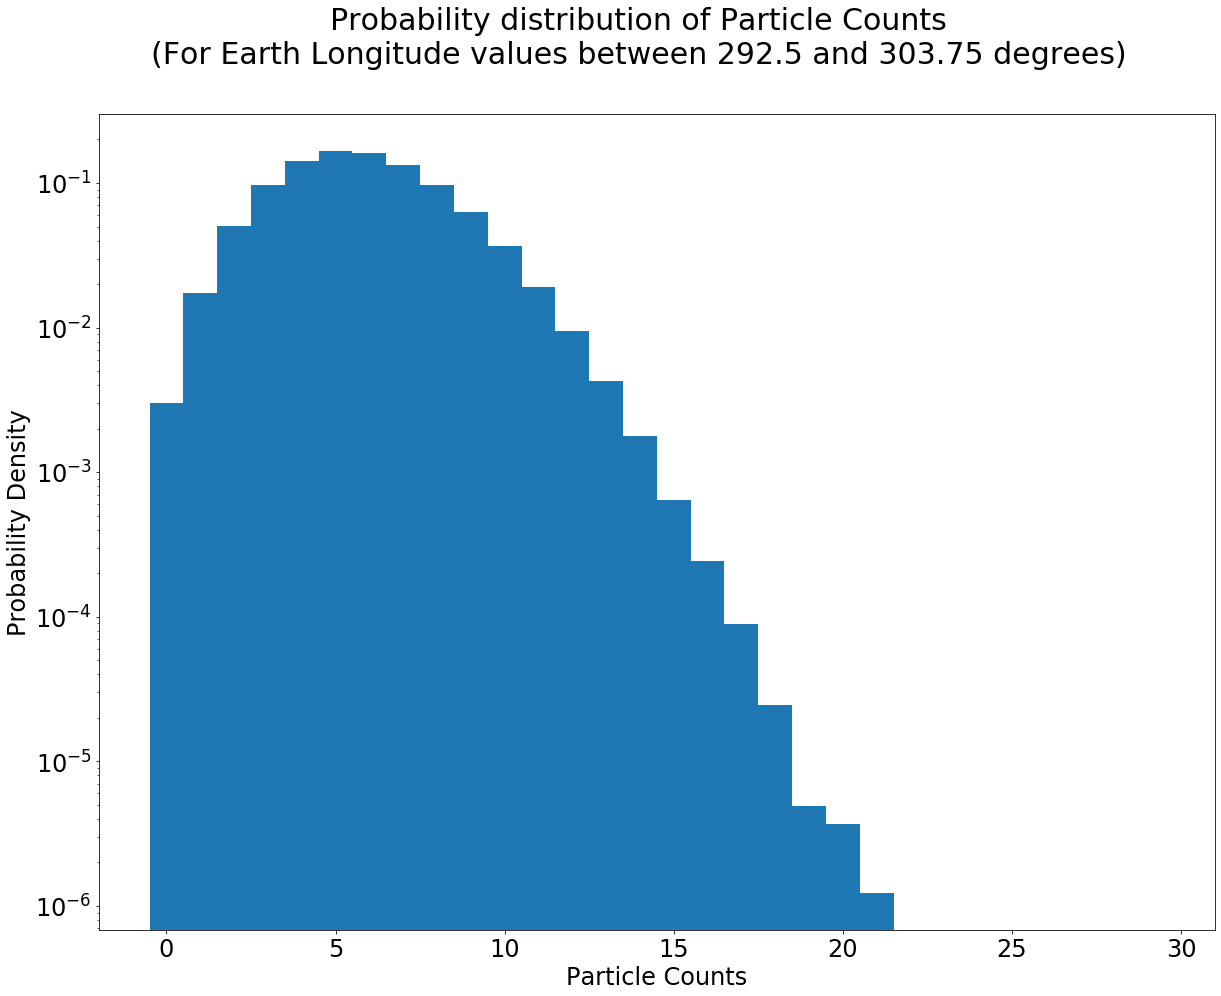

The mean is 5.8248827507898895.


In [226]:
indices = np.intersect1d(np.where(11.25 * 26 <= data[2,:]), np.where(11.25 * 27 >= data[2,:]))
selected = data[3,:][indices]
plt.suptitle('Probability distribution of Particle Counts\n(For Earth Longitude values between ' + str(11.25 * 26) + ' and ' + str(11.25 * 27) + ' degrees)', fontsize=30)
plt.xlabel('Particle Counts', fontsize = 24)
plt.ylabel('Probability Density', fontsize = 24)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.hist(selected, bins = np.arange(-0.5,30.5), density = True)
plt.show()
print("The mean is " + str(np.mean(selected)) + "." )

When we increase our Earth Longitude to between 292.5 and 303.75. the average drops to 5.82, which is about the same as the overall histogram.
<br> The background changes exactly as we've guessed from the 2D histogram:
<br> The mean decreases like an exponential from -33.75 degrees to 326.25 degrees, decreasing quickly at first but gradually come to a halt.

Taking the x value of each bin the bin's center, and all values 326.25 <= x <= 360 subtracted by 360,

We have datapoints
<br>(-28.125, 10.422722896919431),
<br>(-5.625, 9.380700454455642),
<br>(28.125, 8.228942041864139),
<br>(50.625, 7.671508847367635),
<br>(118.125, 6.628556970774092),
<br>(185.625, 6.137641933254344),
<br>(298.125, 5.8248827507898895).

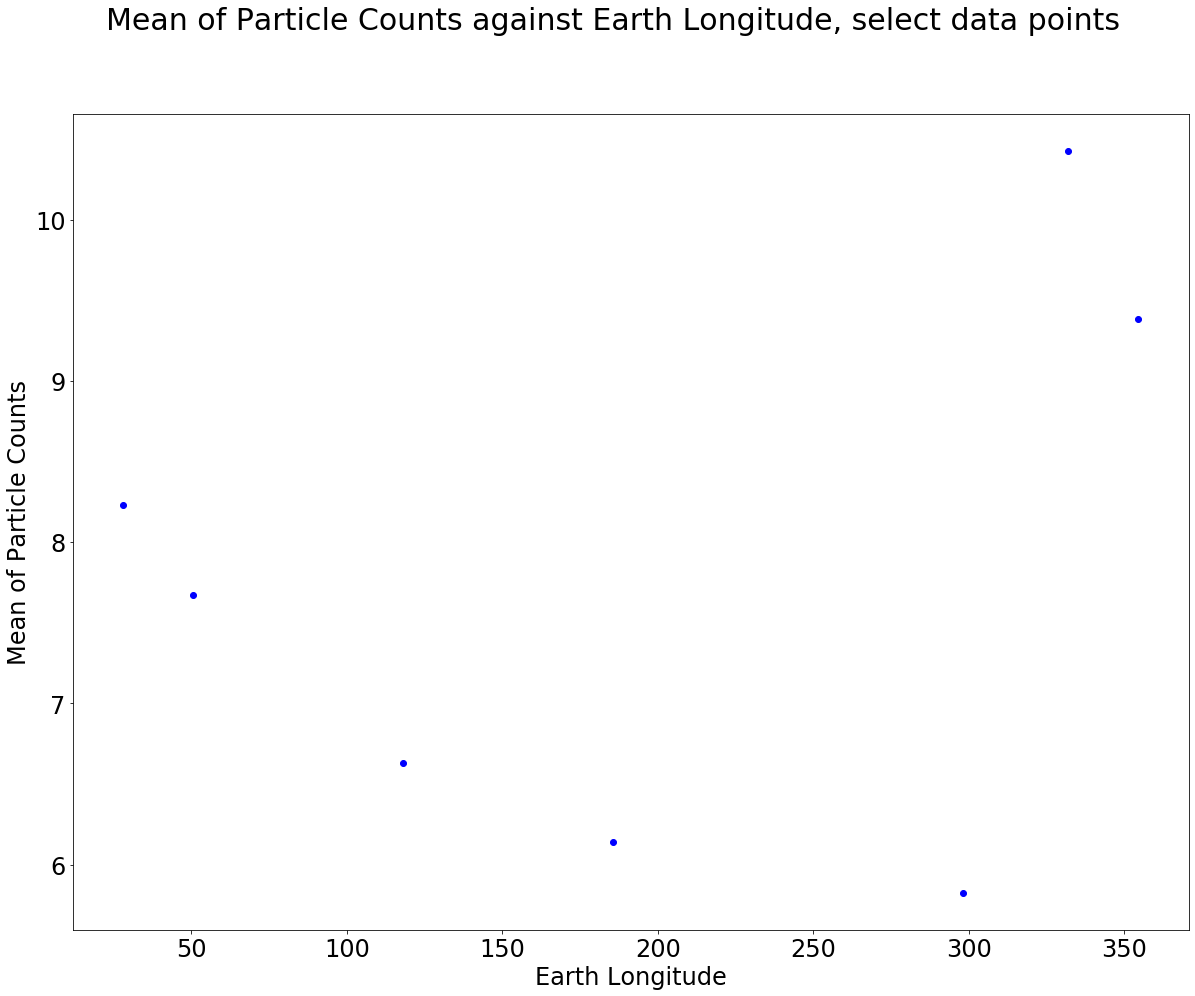

In [255]:
plt.suptitle('Mean of Particle Counts against Earth Longitude, select data points', fontsize=30)
plt.xlabel('Earth Longitude', fontsize = 24)
plt.ylabel('Mean of Particle Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.plot(331.875, 10.422722896919431, 'bo')
plt.plot(354.375, 9.380700454455642, 'bo')
plt.plot(28.125, 8.228942041864139, 'bo')
plt.plot(50.625, 7.671508847367635, 'bo')
plt.plot(118.125, 6.628556970774092, 'bo')
plt.plot(185.625, 6.137641933254344, 'bo')
plt.plot(298.125, 5.8248827507898895, 'bo')

We can do an exp fit for these 7 datapoints.

In [264]:
x = np.array([-28.125, -5.625, 28.125, 50.625, 118.125, 185.625, 298.125])
y = np.array([10.422722896919431, 9.380700454455642, 8.228942041864139, 7.671508847367635, 6.628556970774092, 6.137641933254344, 5.8248827507898895])
fit =scipy.optimize.curve_fit(lambda t,a,b,c,d: a*np.exp(b*(t-d)) + c,  x,  y, p0 = (1, 0.1, 7, 200))
fit

(array([1.57305511e+03, 1.87339398e-01, 7.75642227e+00, 1.60162567e+04]),
 array([[inf, inf, inf, inf],
        [inf, inf, inf, inf],
        [inf, inf, inf, inf],
        [inf, inf, inf, inf]]))

The mean of Particle Counts is related to the Earth Longitude roughly by this equation:
    <br>$\lambda = -7.565*10^{-130} * e^x + 8.078$, if x < 326.25<br>or $\lambda = -7.565*10^{-130} * e^{x - 360} + 8.078$, if x > 326.25.

In [234]:
def expfit_GRB(x):
    return lambda_fit[0] * np.exp(x) + lambda_fit[1] 

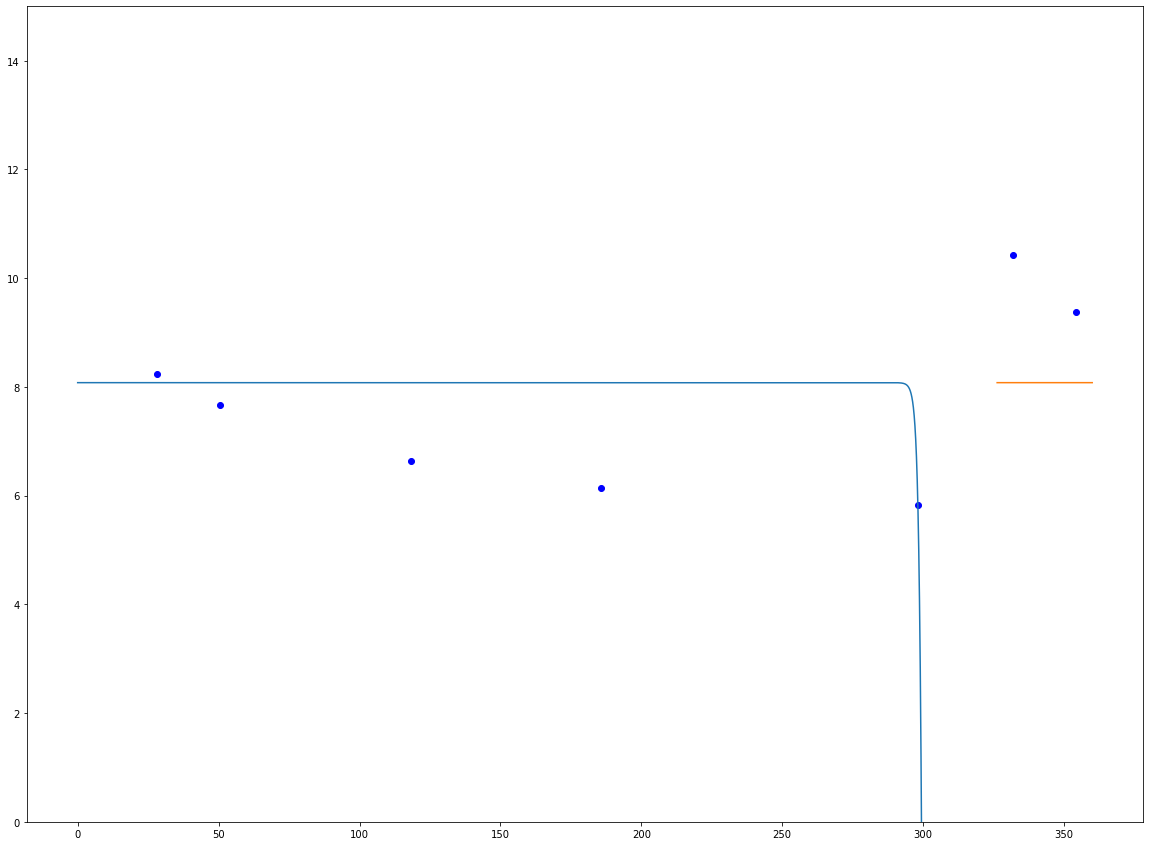

In [241]:
plt.plot(331.875, 10.422722896919431, 'bo')
plt.plot(354.375, 9.380700454455642, 'bo')
plt.plot(28.125, 8.228942041864139, 'bo')
plt.plot(50.625, 7.671508847367635, 'bo')
plt.plot(118.125, 6.628556970774092, 'bo')
plt.plot(185.625, 6.137641933254344, 'bo')
plt.plot(298.125, 5.8248827507898895, 'bo')
x1 = np.arange(0, 326.25, 0.01)
x2 = np.arange(326.25, 360, 0.01)
plt.plot(x1, expfit_GRB(x1))
plt.plot(x2, expfit_GRB(x2 - 360))
plt.ylim(0,15)
plt.show()

# (Insert text)

## 3)


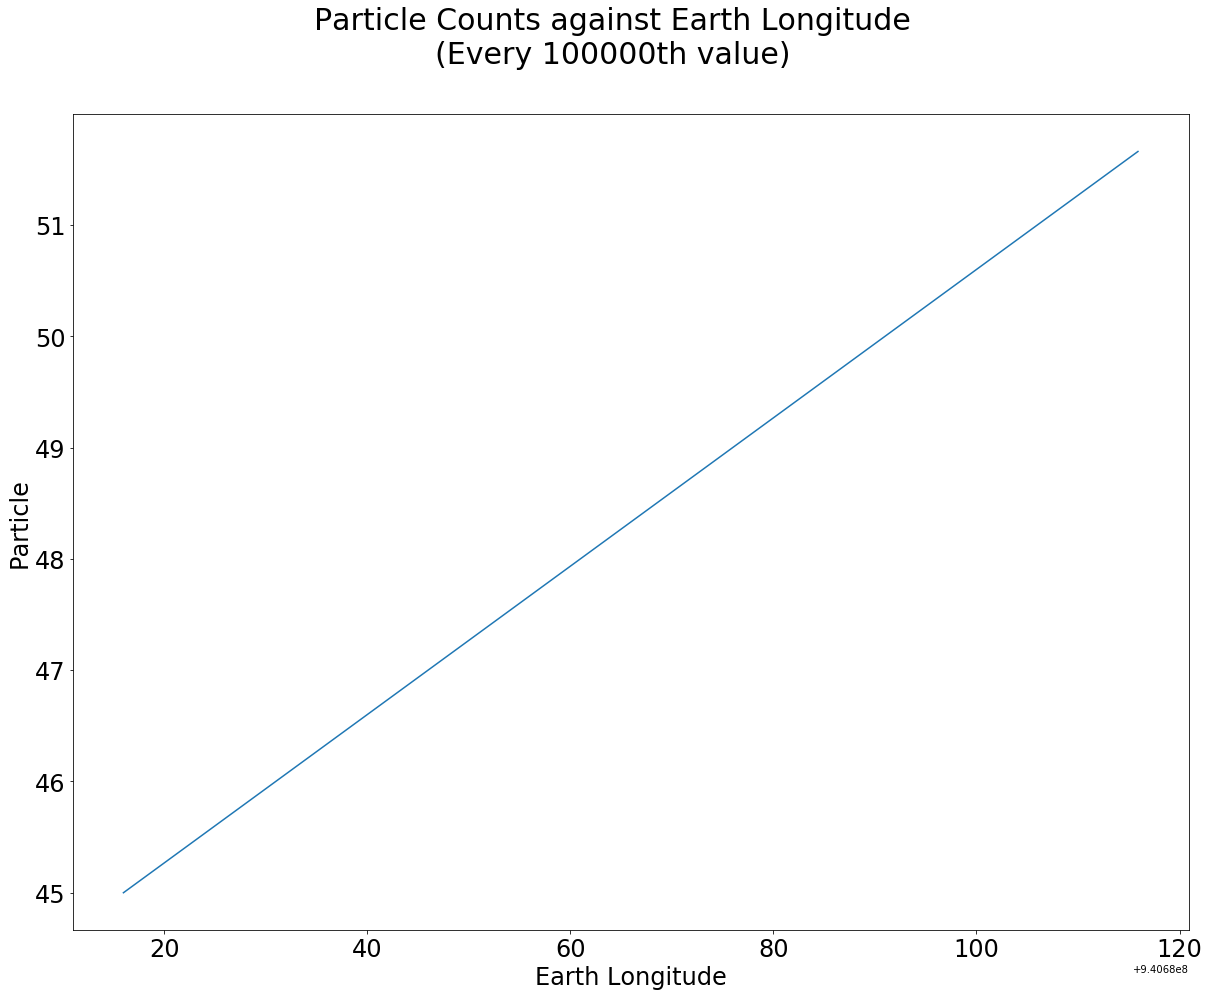

In [170]:
plt.suptitle('Particle Counts against Earth Longitude\n(Every 100000th value)', fontsize=30)
plt.xlabel('Earth Longitude', fontsize = 24)
plt.ylabel('Particle', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.plot(data[0,0:1000], data[2,0:1000])

## 4)

# Problem 2

File Import:

In [134]:
hf = h5py.File('images.h5', 'r')
hf.keys()

<KeysViewHDF5 ['image1', 'imagestack']>

In [135]:
image1 = np.array(hf.get('image1'))


In [136]:
imagestack = np.array(hf.get('imagestack'))

In [137]:
hf.close()

In [160]:
print(max(image1.flatten()))
print(min(image1.flatten()))
print(max(imagestack.flatten()))
print(min(imagestack.flatten()))

46.84317561571535
-2.3061570283216652
47.79010819628649
-2.709336827866645


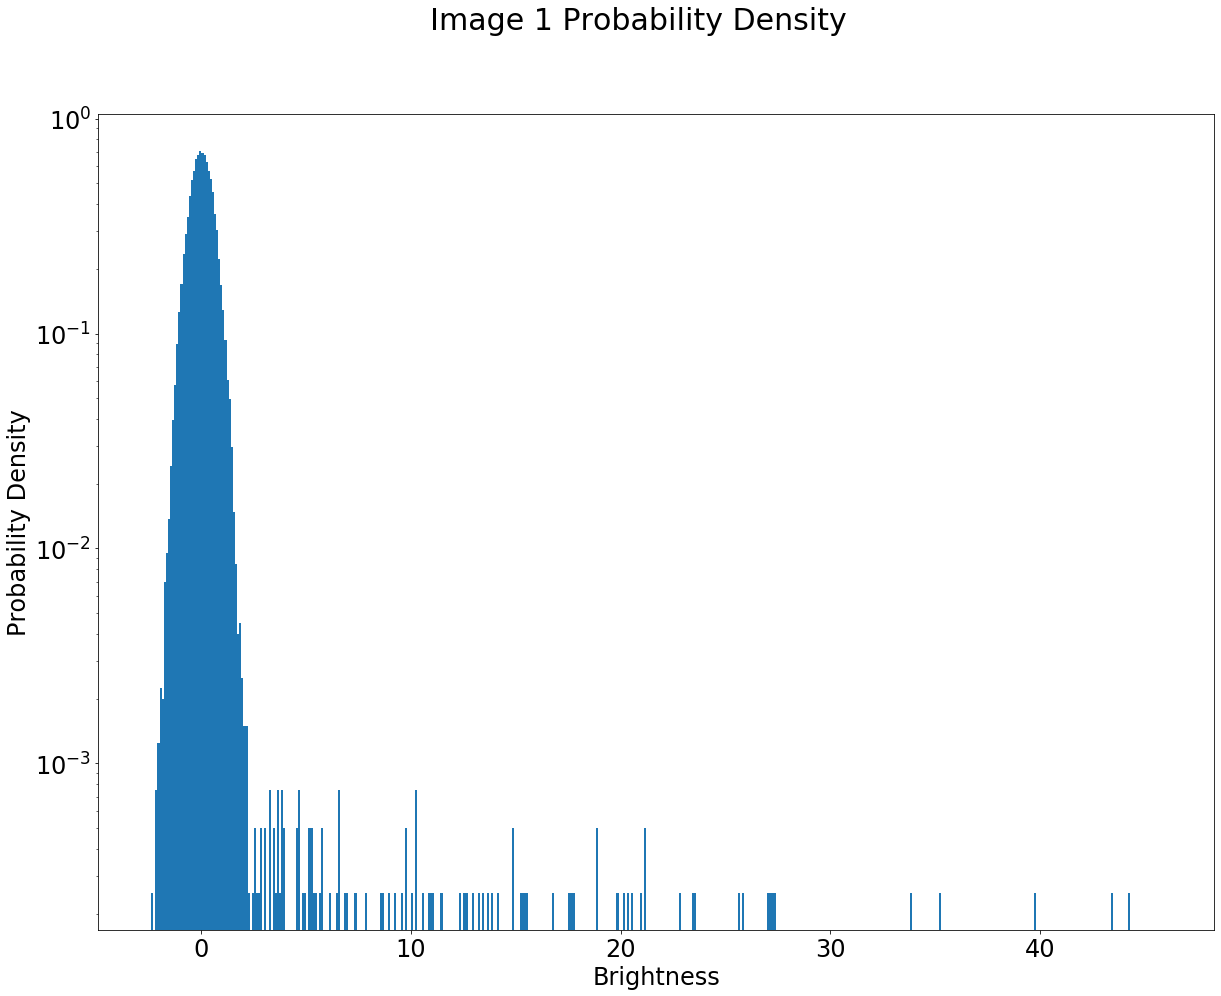

In [163]:
plt.suptitle('Image 1 Probability Density', fontsize=30)
plt.xlabel('Brightness', fontsize = 24)
plt.ylabel('Probability Density', fontsize = 24)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.hist(image1.flatten(), bins = np.arange(-2.5,46, 0.1), density = True)
plt.show()

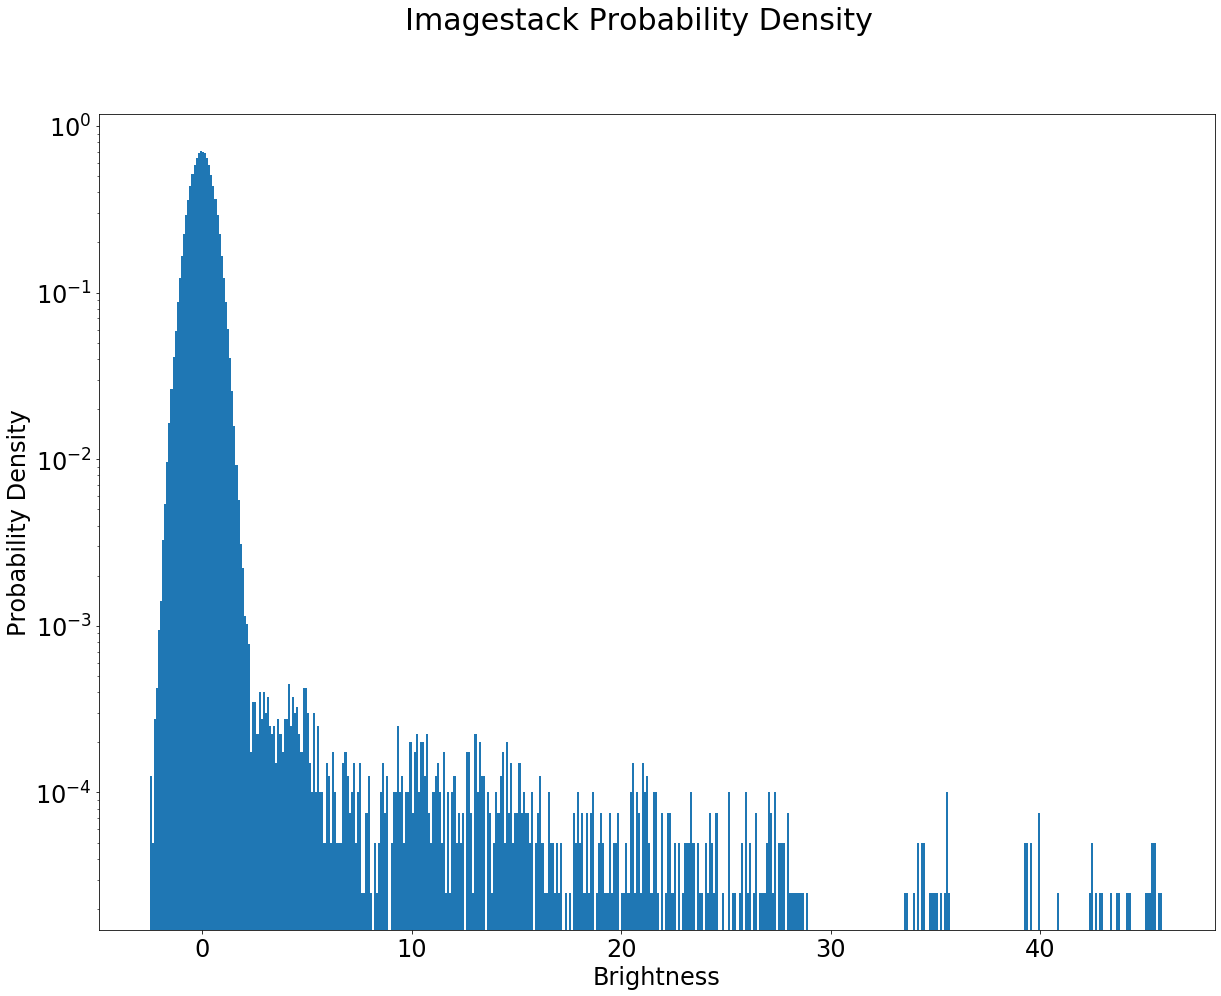

In [164]:
plt.suptitle('Imagestack Probability Density', fontsize=30)
plt.xlabel('Brightness', fontsize = 24)
plt.ylabel('Probability Density', fontsize = 24)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.hist(imagestack.flatten(), bins = np.arange(-2.5,46, 0.1), density = True)
plt.show()

In [220]:
360 * 52/53

353.20754716981133